In [1]:
# Import libraries
import numpy as np
from numpy import linalg as LA

import random
import time

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

**Standard Search**

In [69]:
def StandardSearch(f, triple, tol, search_min=True, parabolic_interp=False):
    # function which searches for extrema of f(x) via a bracketing-and-bisection method
    # triple = (a c b) must bracket the minimum such that f(c) < f(a) and f(c) < f(b)
    
    pm = 1
    if search_min == False:
        pm = -1 # if we wish to search for a maximum of f(x) we must find minimum of -f(x)
    
    [a, c, b] = triple

    if pm*f(c) >= pm*f(a) and pm*f(c) >= pm*f(b): # sanity check input is bracketed
        return 'triple must be bracketed ie. f(c) < f(a) and f(c) < f(b)'
        
    if parabolic_interp == True:
        while b - c > tol:
            # parabolic interpolation
            x = b-0.5*((b-a)**2*(f(b)-f(c))-(b-c)**2*(f(b)-f(a)))/((b-a)*(f(b)-f(c))-(b-c)*(f(b)-f(a)))
            trial = f(x)
            
            if x > c:
                if pm*f(c) < pm*f(a) and pm*f(c) < pm*trial: # case 1A
                    [a, c, b] = [a, c, x]
                
                elif pm*trial < pm*f(c) and pm*trial < pm*f(b): # case 1B
                    [a, c, b] = [c, x, b]
            
            elif x < c:
                if pm*trial < pm*f(a) and pm*trial < pm*f(c): # case 2A
                    [a, c, b] = [a, x, c]
                
                elif pm*f(c) < pm*trial and pm*f(c) < pm*f(b): # case 2B
                    [a, c, b] = [x, c, b]
            
            elif x == c:
                [a, c, b] = [a, x, c]
            
        return c

    
    else:
        while b - c > tol:
            x1 = (c - a)/2
            x2 = (b - c)/2
            trial1 = f(x1)
            trial2 = f(x2)
                
            if pm*trial1 < pm*f(a) and pm*trial1 < pm*f(c): # case 1
                [a, c, b] = [a, x1, c]
                    
            elif pm*f(c) < pm*trial1 and pm*f(c) < pm*trial2: # case 2
                [a, c, b] = [x1, c, x2]
                
            elif pm*trial2 < pm*f(c) and pm*trial2 < pm*f(b): # case 3
                [a, c, b] = [c, x2, b]
                
        return c

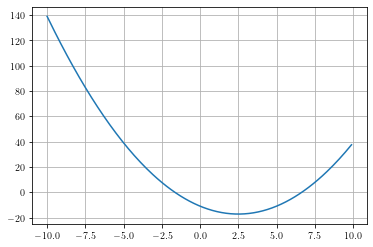

In [70]:
def f(x):
    return x**2 - 5*x - 11

x = np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.grid()

In [71]:
x_star = StandardSearch(f,[-2,4,7],1e-2,parabolic_interp=True)
x_star

2.5

**Golden Search**

In [31]:
def GoldenSearch(f, interval, tol, search_min=True):
    # function which searches for extrema of f(x) via a bracketing-and-bisection method
    # triple = (a c b) must bracket the minimum such that f(c) < f(a) and f(c) < f(b)
    
    pm = 1
    if search_min == False:
        pm = -1 # if we wish to search for a maximum of f(x) we must find minimum of -f(x)
    
    [a, b] = interval
    
    # choosing c (makes (c, b) the larger interval)
    phi_p = (np.sqrt(5) + 1)/2
    phi_m = (np.sqrt(5) - 1)/2
    p = (b - a)/phi_p
    c = a + p*phi_m

    if pm*f(c) >= pm*f(a) and pm*f(c) >= pm*f(b): # sanity check input is bracketed
        return 'triple must be bracketed ie. f(c) < f(a) and f(c) < f(b)'
        
    else:
        while b - c > tol:
            x = a + b - c
            trial = f(x)
            print(c)
            print(x)
            
            if pm*f(c) < pm*f(a) and pm*f(c) < pm*trial: # case 1
                [a, c, b] = [a, c, x]
                
            elif pm*trial < pm*f(c) and pm*trial < pm*f(b): # case 2
                [a, c, b] = [c, x, b]
                
            
        return c

In [33]:
GoldenSearch(f,[1,7],1e-6)

3.291796067500631
4.708203932499369
3.291796067500631
2.4164078649987384
2.4164078649987384
5.583592135001261
2.4164078649987384
6.458980337503153
2.4164078649987384
7.334368540005045
2.4164078649987384
8.209756742506936
2.4164078649987384
9.085144945008828
2.4164078649987384
9.96053314751072
2.4164078649987384
10.835921350012612
2.4164078649987384
11.711309552514503
2.4164078649987384
12.586697755016395
2.4164078649987384
13.462085957518287
2.4164078649987384
14.337474160020179
2.4164078649987384
15.21286236252207
2.4164078649987384
16.088250565023962
2.4164078649987384
16.963638767525854
2.4164078649987384
17.839026970027746
2.4164078649987384
18.714415172529637
2.4164078649987384
19.58980337503153
2.4164078649987384
20.46519157753342
2.4164078649987384
21.340579780035313
2.4164078649987384
22.215967982537205
2.4164078649987384
23.091356185039096
2.4164078649987384
23.966744387540988
2.4164078649987384
24.84213259004288
2.4164078649987384
25.71752079254477
2.4164078649987384
26.59290

1044.6693885047362
2.4164078649987384
1045.544776707238
2.4164078649987384
1046.42016490974
2.4164078649987384
1047.2955531122418
2.4164078649987384
1048.1709413147437
2.4164078649987384
1049.0463295172456
2.4164078649987384
1049.9217177197474
2.4164078649987384
1050.7971059222493
2.4164078649987384
1051.6724941247512
2.4164078649987384
1052.547882327253
2.4164078649987384
1053.423270529755
2.4164078649987384
1054.2986587322569
2.4164078649987384
1055.1740469347587
2.4164078649987384
1056.0494351372606
2.4164078649987384
1056.9248233397625
2.4164078649987384
1057.8002115422644
2.4164078649987384
1058.6755997447663
2.4164078649987384
1059.5509879472681
2.4164078649987384
1060.42637614977
2.4164078649987384
1061.301764352272
2.4164078649987384
1062.1771525547738
2.4164078649987384
1063.0525407572757
2.4164078649987384
1063.9279289597775
2.4164078649987384
1064.8033171622794
2.4164078649987384
1065.6787053647813
2.4164078649987384
1066.5540935672832
2.4164078649987384
1067.429481769785
2.

2.4164078649987384
2016.3502932818242
2.4164078649987384
2017.225681484326
2.4164078649987384
2018.101069686828
2.4164078649987384
2018.9764578893298
2.4164078649987384
2019.8518460918317
2.4164078649987384
2020.7272342943336
2.4164078649987384
2021.6026224968355
2.4164078649987384
2022.4780106993373
2.4164078649987384
2023.3533989018392
2.4164078649987384
2024.228787104341
2.4164078649987384
2025.104175306843
2.4164078649987384
2025.9795635093449
2.4164078649987384
2026.8549517118468
2.4164078649987384
2027.7303399143486
2.4164078649987384
2028.6057281168505
2.4164078649987384
2029.4811163193524
2.4164078649987384
2030.3565045218543
2.4164078649987384
2031.2318927243562
2.4164078649987384
2032.107280926858
2.4164078649987384
2032.98266912936
2.4164078649987384
2033.8580573318618
2.4164078649987384
2034.7334455343637
2.4164078649987384
2035.6088337368656
2.4164078649987384
2036.4842219393674
2.4164078649987384
2037.3596101418693
2.4164078649987384
2038.2349983443712
2.4164078649987384


2.4164078649987384
2899.616989606444
2.4164078649987384
2900.492377808946
2.4164078649987384
2901.367766011448
2.4164078649987384
2902.24315421395
2.4164078649987384
2903.1185424164523
2.4164078649987384
2903.9939306189544
2.4164078649987384
2904.8693188214565
2.4164078649987384
2905.7447070239587
2.4164078649987384
2906.6200952264608
2.4164078649987384
2907.495483428963
2.4164078649987384
2908.370871631465
2.4164078649987384
2909.246259833967
2.4164078649987384
2910.121648036469
2.4164078649987384
2910.9970362389713
2.4164078649987384
2911.8724244414734
2.4164078649987384
2912.7478126439755
2.4164078649987384
2913.6232008464776
2.4164078649987384
2914.4985890489797
2.4164078649987384
2915.373977251482
2.4164078649987384
2916.249365453984
2.4164078649987384
2917.124753656486
2.4164078649987384
2918.000141858988
2.4164078649987384
2918.8755300614903
2.4164078649987384
2919.7509182639924
2.4164078649987384
2920.6263064664945
2.4164078649987384
2921.5016946689966
2.4164078649987384
2922.3

2.4164078649987384
3824.0269314486704
2.4164078649987384
3824.9023196511725
2.4164078649987384
3825.7777078536747
2.4164078649987384
3826.6530960561768
2.4164078649987384
3827.528484258679
2.4164078649987384
3828.403872461181
2.4164078649987384
3829.279260663683
2.4164078649987384
3830.154648866185
2.4164078649987384
3831.0300370686873
2.4164078649987384
3831.9054252711894
2.4164078649987384
3832.7808134736915
2.4164078649987384
3833.6562016761936
2.4164078649987384
3834.5315898786957
2.4164078649987384
3835.406978081198
2.4164078649987384
3836.2823662837
2.4164078649987384
3837.157754486202
2.4164078649987384
3838.033142688704
2.4164078649987384
3838.9085308912063
2.4164078649987384
3839.7839190937084
2.4164078649987384
3840.6593072962105
2.4164078649987384
3841.5346954987126
2.4164078649987384
3842.4100837012147
2.4164078649987384
3843.285471903717
2.4164078649987384
3844.160860106219
2.4164078649987384
3845.036248308721
2.4164078649987384
3845.911636511223
2.4164078649987384
3846.78

2.4164078649987384
4779.950848580973
2.4164078649987384
4780.826236783475
2.4164078649987384
4781.701624985977
2.4164078649987384
4782.577013188479
2.4164078649987384
4783.452401390981
2.4164078649987384
4784.327789593483
2.4164078649987384
4785.2031777959855
2.4164078649987384
4786.078565998488
2.4164078649987384
4786.95395420099
2.4164078649987384
4787.829342403492
2.4164078649987384
4788.704730605994
2.4164078649987384
4789.580118808496
2.4164078649987384
4790.455507010998
2.4164078649987384
4791.3308952135
2.4164078649987384
4792.206283416002
2.4164078649987384
4793.0816716185045
2.4164078649987384
4793.957059821007
2.4164078649987384
4794.832448023509
2.4164078649987384
4795.707836226011
2.4164078649987384
4796.583224428513
2.4164078649987384
4797.458612631015
2.4164078649987384
4798.334000833517
2.4164078649987384
4799.209389036019
2.4164078649987384
4800.084777238521
2.4164078649987384
4800.9601654410235
2.4164078649987384
4801.835553643526
2.4164078649987384
4802.710941846028
2

2.4164078649987384
5779.644175838381
2.4164078649987384
5780.519564040883
2.4164078649987384
5781.394952243385
2.4164078649987384
5782.270340445887
2.4164078649987384
5783.145728648389
2.4164078649987384
5784.021116850891
2.4164078649987384
5784.896505053393
2.4164078649987384
5785.7718932558955
2.4164078649987384
5786.647281458398
2.4164078649987384
5787.5226696609
2.4164078649987384
5788.398057863402
2.4164078649987384
5789.273446065904
2.4164078649987384
5790.148834268406
2.4164078649987384
5791.024222470908
2.4164078649987384
5791.89961067341
2.4164078649987384
5792.774998875912
2.4164078649987384
5793.6503870784145
2.4164078649987384
5794.525775280917
2.4164078649987384
5795.401163483419
2.4164078649987384
5796.276551685921
2.4164078649987384
5797.151939888423
2.4164078649987384
5798.027328090925
2.4164078649987384
5798.902716293427
2.4164078649987384
5799.778104495929
2.4164078649987384
5800.653492698431
2.4164078649987384
5801.5288809009335
2.4164078649987384
5802.404269103436
2

2.4164078649987384
6794.2191025383245
2.4164078649987384
6795.094490740827
2.4164078649987384
6795.969878943329
2.4164078649987384
6796.845267145831
2.4164078649987384
6797.720655348333
2.4164078649987384
6798.596043550835
2.4164078649987384
6799.471431753337
2.4164078649987384
6800.346819955839
2.4164078649987384
6801.222208158341
2.4164078649987384
6802.097596360843
2.4164078649987384
6802.972984563346
2.4164078649987384
6803.848372765848
2.4164078649987384
6804.72376096835
2.4164078649987384
6805.599149170852
2.4164078649987384
6806.474537373354
2.4164078649987384
6807.349925575856
2.4164078649987384
6808.225313778358
2.4164078649987384
6809.10070198086
2.4164078649987384
6809.976090183362
2.4164078649987384
6810.8514783858645
2.4164078649987384
6811.726866588367
2.4164078649987384
6812.602254790869
2.4164078649987384
6813.477642993371
2.4164078649987384
6814.353031195873
2.4164078649987384
6815.228419398375
2.4164078649987384
6816.103807600877
2.4164078649987384
6816.979195803379
2

7773.778501138184
2.4164078649987384
7774.653889340686
2.4164078649987384
7775.529277543188
2.4164078649987384
7776.40466574569
2.4164078649987384
7777.280053948192
2.4164078649987384
7778.155442150694
2.4164078649987384
7779.0308303531965
2.4164078649987384
7779.906218555699
2.4164078649987384
7780.781606758201
2.4164078649987384
7781.656994960703
2.4164078649987384
7782.532383163205
2.4164078649987384
7783.407771365707
2.4164078649987384
7784.283159568209
2.4164078649987384
7785.158547770711
2.4164078649987384
7786.033935973213
2.4164078649987384
7786.9093241757155
2.4164078649987384
7787.784712378218
2.4164078649987384
7788.66010058072
2.4164078649987384
7789.535488783222
2.4164078649987384
7790.410876985724
2.4164078649987384
7791.286265188226
2.4164078649987384
7792.161653390728
2.4164078649987384
7793.03704159323
2.4164078649987384
7793.912429795732
2.4164078649987384
7794.7878179982345
2.4164078649987384
7795.663206200737
2.4164078649987384
7796.538594403239
2.4164078649987384
7

8628.15738677979
2.4164078649987384
8629.032774982292
2.4164078649987384
8629.908163184793
2.4164078649987384
8630.783551387294
2.4164078649987384
8631.658939589795
2.4164078649987384
8632.534327792297
2.4164078649987384
8633.409715994798
2.4164078649987384
8634.285104197299
2.4164078649987384
8635.1604923998
2.4164078649987384
8636.035880602301
2.4164078649987384
8636.911268804803
2.4164078649987384
8637.786657007304
2.4164078649987384
8638.662045209805
2.4164078649987384
8639.537433412306
2.4164078649987384
8640.412821614807
2.4164078649987384
8641.288209817309
2.4164078649987384
8642.16359801981
2.4164078649987384
8643.038986222311
2.4164078649987384
8643.914374424812
2.4164078649987384
8644.789762627313
2.4164078649987384
8645.665150829815
2.4164078649987384
8646.540539032316
2.4164078649987384
8647.415927234817
2.4164078649987384
8648.291315437318
2.4164078649987384
8649.16670363982
2.4164078649987384
8650.04209184232
2.4164078649987384
8650.917480044822
2.4164078649987384
8651.79

9690.003276413745
2.4164078649987384
9690.878664616246
2.4164078649987384
9691.754052818747
2.4164078649987384
9692.629441021249
2.4164078649987384
9693.50482922375
2.4164078649987384
9694.380217426251
2.4164078649987384
9695.255605628752
2.4164078649987384
9696.130993831253
2.4164078649987384
9697.006382033755
2.4164078649987384
9697.881770236256
2.4164078649987384
9698.757158438757
2.4164078649987384
9699.632546641258
2.4164078649987384
9700.50793484376
2.4164078649987384
9701.38332304626
2.4164078649987384
9702.258711248762
2.4164078649987384
9703.134099451263
2.4164078649987384
9704.009487653764
2.4164078649987384
9704.884875856265
2.4164078649987384
9705.760264058767
2.4164078649987384
9706.635652261268
2.4164078649987384
9707.511040463769
2.4164078649987384
9708.38642866627
2.4164078649987384
9709.261816868771
2.4164078649987384
9710.137205071273
2.4164078649987384
9711.012593273774
2.4164078649987384
9711.887981476275
2.4164078649987384
9712.763369678776
2.4164078649987384
9713.

2.4164078649987384
10560.139149699937
2.4164078649987384
10561.014537902438
2.4164078649987384
10561.88992610494
2.4164078649987384
10562.76531430744
2.4164078649987384
10563.640702509942
2.4164078649987384
10564.516090712443
2.4164078649987384
10565.391478914944
2.4164078649987384
10566.266867117445
2.4164078649987384
10567.142255319946
2.4164078649987384
10568.017643522448
2.4164078649987384
10568.893031724949
2.4164078649987384
10569.76841992745
2.4164078649987384
10570.643808129951
2.4164078649987384
10571.519196332452
2.4164078649987384
10572.394584534954
2.4164078649987384
10573.269972737455
2.4164078649987384
10574.145360939956
2.4164078649987384
10575.020749142457
2.4164078649987384
10575.896137344958
2.4164078649987384
10576.77152554746
2.4164078649987384
10577.64691374996
2.4164078649987384
10578.522301952462
2.4164078649987384
10579.397690154963
2.4164078649987384
10580.273078357464
2.4164078649987384
10581.148466559966
2.4164078649987384
10582.023854762467
2.416407864998738

11504.68302019873
2.4164078649987384
11505.558408401232
2.4164078649987384
11506.433796603733
2.4164078649987384
11507.309184806234
2.4164078649987384
11508.184573008735
2.4164078649987384
11509.059961211236
2.4164078649987384
11509.935349413738
2.4164078649987384
11510.810737616239
2.4164078649987384
11511.68612581874
2.4164078649987384
11512.561514021241
2.4164078649987384
11513.436902223742
2.4164078649987384
11514.312290426244
2.4164078649987384
11515.187678628745
2.4164078649987384
11516.063066831246
2.4164078649987384
11516.938455033747
2.4164078649987384
11517.813843236248
2.4164078649987384
11518.68923143875
2.4164078649987384
11519.56461964125
2.4164078649987384
11520.440007843752
2.4164078649987384
11521.315396046253
2.4164078649987384
11522.190784248754
2.4164078649987384
11523.066172451256
2.4164078649987384
11523.941560653757
2.4164078649987384
11524.816948856258
2.4164078649987384
11525.69233705876
2.4164078649987384
11526.56772526126
2.4164078649987384
11527.443113463762

2.4164078649987384
12521.008723302622
2.4164078649987384
12521.884111505124
2.4164078649987384
12522.759499707625
2.4164078649987384
12523.634887910126
2.4164078649987384
12524.510276112627
2.4164078649987384
12525.385664315128
2.4164078649987384
12526.26105251763
2.4164078649987384
12527.13644072013
2.4164078649987384
12528.011828922632
2.4164078649987384
12528.887217125133
2.4164078649987384
12529.762605327634
2.4164078649987384
12530.637993530136
2.4164078649987384
12531.513381732637
2.4164078649987384
12532.388769935138
2.4164078649987384
12533.26415813764
2.4164078649987384
12534.13954634014
2.4164078649987384
12535.014934542642
2.4164078649987384
12535.890322745143
2.4164078649987384
12536.765710947644
2.4164078649987384
12537.641099150145
2.4164078649987384
12538.516487352646
2.4164078649987384
12539.391875555148
2.4164078649987384
12540.267263757649
2.4164078649987384
12541.14265196015
2.4164078649987384
12542.018040162651
2.4164078649987384
12542.893428365152
2.416407864998738

13177.549875178522
2.4164078649987384
13178.425263381023
2.4164078649987384
13179.300651583524
2.4164078649987384
13180.176039786025
2.4164078649987384
13181.051427988526
2.4164078649987384
13181.926816191028
2.4164078649987384
13182.802204393529
2.4164078649987384
13183.67759259603
2.4164078649987384
13184.552980798531
2.4164078649987384
13185.428369001032
2.4164078649987384
13186.303757203534
2.4164078649987384
13187.179145406035
2.4164078649987384
13188.054533608536
2.4164078649987384
13188.929921811037
2.4164078649987384
13189.805310013538
2.4164078649987384
13190.68069821604
2.4164078649987384
13191.55608641854
2.4164078649987384
13192.431474621042
2.4164078649987384
13193.306862823543
2.4164078649987384
13194.182251026044
2.4164078649987384
13195.057639228546
2.4164078649987384
13195.933027431047
2.4164078649987384
13196.808415633548
2.4164078649987384
13197.68380383605
2.4164078649987384
13198.55919203855
2.4164078649987384
13199.434580241052
2.4164078649987384
13200.30996844355

14154.48310916986
2.4164078649987384
14155.358497372361
2.4164078649987384
14156.233885574862
2.4164078649987384
14157.109273777363
2.4164078649987384
14157.984661979865
2.4164078649987384
14158.860050182366
2.4164078649987384
14159.735438384867
2.4164078649987384
14160.610826587368
2.4164078649987384
14161.48621478987
2.4164078649987384
14162.36160299237
2.4164078649987384
14163.236991194872
2.4164078649987384
14164.112379397373
2.4164078649987384
14164.987767599874
2.4164078649987384
14165.863155802375
2.4164078649987384
14166.738544004877
2.4164078649987384
14167.613932207378
2.4164078649987384
14168.489320409879
2.4164078649987384
14169.36470861238
2.4164078649987384
14170.240096814881
2.4164078649987384
14171.115485017383
2.4164078649987384
14171.990873219884
2.4164078649987384
14172.866261422385
2.4164078649987384
14173.741649624886
2.4164078649987384
14174.617037827387
2.4164078649987384
14175.492426029889
2.4164078649987384
14176.36781423239
2.4164078649987384
14177.24320243489

2.4164078649987384
14993.105007166008
2.4164078649987384
14993.98039536851
2.4164078649987384
14994.85578357101
2.4164078649987384
14995.731171773512
2.4164078649987384
14996.606559976013
2.4164078649987384
14997.481948178514
2.4164078649987384
14998.357336381016
2.4164078649987384
14999.232724583517
2.4164078649987384
15000.108112786018
2.4164078649987384
15000.98350098852
2.4164078649987384
15001.85888919102
2.4164078649987384
15002.734277393522
2.4164078649987384
15003.609665596023
2.4164078649987384
15004.485053798524
2.4164078649987384
15005.360442001025
2.4164078649987384
15006.235830203526
2.4164078649987384
15007.111218406028
2.4164078649987384
15007.986606608529
2.4164078649987384
15008.86199481103
2.4164078649987384
15009.737383013531
2.4164078649987384
15010.612771216032
2.4164078649987384
15011.488159418534
2.4164078649987384
15012.363547621035
2.4164078649987384
15013.238935823536
2.4164078649987384
15014.114324026037
2.4164078649987384
15014.989712228538
2.416407864998738

2.4164078649987384
15887.751750122234
2.4164078649987384
15888.627138324735
2.4164078649987384
15889.502526527236
2.4164078649987384
15890.377914729737
2.4164078649987384
15891.253302932239
2.4164078649987384
15892.12869113474
2.4164078649987384
15893.004079337241
2.4164078649987384
15893.879467539742
2.4164078649987384
15894.754855742243
2.4164078649987384
15895.630243944745
2.4164078649987384
15896.505632147246
2.4164078649987384
15897.381020349747
2.4164078649987384
15898.256408552248
2.4164078649987384
15899.13179675475
2.4164078649987384
15900.00718495725
2.4164078649987384
15900.882573159752
2.4164078649987384
15901.757961362253
2.4164078649987384
15902.633349564754
2.4164078649987384
15903.508737767255
2.4164078649987384
15904.384125969756
2.4164078649987384
15905.259514172258
2.4164078649987384
15906.134902374759
2.4164078649987384
15907.01029057726
2.4164078649987384
15907.885678779761
2.4164078649987384
15908.761066982262
2.4164078649987384
15909.636455184764
2.41640786499873

2.4164078649987384
16712.367436878365
2.4164078649987384
16713.242825080866
2.4164078649987384
16714.118213283367
2.4164078649987384
16714.99360148587
2.4164078649987384
16715.86898968837
2.4164078649987384
16716.74437789087
2.4164078649987384
16717.619766093372
2.4164078649987384
16718.495154295873
2.4164078649987384
16719.370542498375
2.4164078649987384
16720.245930700876
2.4164078649987384
16721.121318903377
2.4164078649987384
16721.996707105878
2.4164078649987384
16722.87209530838
2.4164078649987384
16723.74748351088
2.4164078649987384
16724.62287171338
2.4164078649987384
16725.498259915883
2.4164078649987384
16726.373648118384
2.4164078649987384
16727.249036320885
2.4164078649987384
16728.124424523387
2.4164078649987384
16728.999812725888
2.4164078649987384
16729.87520092839
2.4164078649987384
16730.75058913089
2.4164078649987384
16731.62597733339
2.4164078649987384
16732.501365535893
2.4164078649987384
16733.376753738394
2.4164078649987384
16734.252141940895
2.4164078649987384
16

17593.883356797072
2.4164078649987384
17594.758744999574
2.4164078649987384
17595.634133202075
2.4164078649987384
17596.509521404576
2.4164078649987384
17597.384909607077
2.4164078649987384
17598.26029780958
2.4164078649987384
17599.13568601208
2.4164078649987384
17600.01107421458
2.4164078649987384
17600.886462417082
2.4164078649987384
17601.761850619583
2.4164078649987384
17602.637238822084
2.4164078649987384
17603.512627024586
2.4164078649987384
17604.388015227087
2.4164078649987384
17605.263403429588
2.4164078649987384
17606.13879163209
2.4164078649987384
17607.01417983459
2.4164078649987384
17607.88956803709
2.4164078649987384
17608.764956239593
2.4164078649987384
17609.640344442094
2.4164078649987384
17610.515732644595
2.4164078649987384
17611.391120847096
2.4164078649987384
17612.266509049598
2.4164078649987384
17613.1418972521
2.4164078649987384
17614.0172854546
2.4164078649987384
17614.8926736571
2.4164078649987384
17615.768061859602
2.4164078649987384
17616.643450062104
2.416

2.4164078649987384
18697.747880151084
2.4164078649987384
18698.623268353585
2.4164078649987384
18699.498656556087
2.4164078649987384
18700.374044758588
2.4164078649987384
18701.24943296109
2.4164078649987384
18702.12482116359
2.4164078649987384
18703.00020936609
2.4164078649987384
18703.875597568593
2.4164078649987384
18704.750985771094
2.4164078649987384
18705.626373973595
2.4164078649987384
18706.501762176096
2.4164078649987384
18707.377150378597
2.4164078649987384
18708.2525385811
2.4164078649987384
18709.1279267836
2.4164078649987384
18710.0033149861
2.4164078649987384
18710.878703188602
2.4164078649987384
18711.754091391103
2.4164078649987384
18712.629479593605
2.4164078649987384
18713.504867796106
2.4164078649987384
18714.380255998607
2.4164078649987384
18715.25564420111
2.4164078649987384
18716.13103240361
2.4164078649987384
18717.00642060611
2.4164078649987384
18717.881808808612
2.4164078649987384
18718.757197011113
2.4164078649987384
18719.632585213614
2.4164078649987384
18720

19595.020787714813
2.4164078649987384
19595.896175917314
2.4164078649987384
19596.771564119816
2.4164078649987384
19597.646952322317
2.4164078649987384
19598.522340524818
2.4164078649987384
19599.39772872732
2.4164078649987384
19600.27311692982
2.4164078649987384
19601.14850513232
2.4164078649987384
19602.023893334823
2.4164078649987384
19602.899281537324
2.4164078649987384
19603.774669739825
2.4164078649987384
19604.650057942326
2.4164078649987384
19605.525446144828
2.4164078649987384
19606.40083434733
2.4164078649987384
19607.27622254983
2.4164078649987384
19608.15161075233
2.4164078649987384
19609.026998954832
2.4164078649987384
19609.902387157334
2.4164078649987384
19610.777775359835
2.4164078649987384
19611.653163562336
2.4164078649987384
19612.528551764837
2.4164078649987384
19613.40393996734
2.4164078649987384
19614.27932816984
2.4164078649987384
19615.15471637234
2.4164078649987384
19616.030104574842
2.4164078649987384
19616.905492777343
2.4164078649987384
19617.780880979844
2.

20557.947810466132
2.4164078649987384
20558.823198668633
2.4164078649987384
20559.698586871134
2.4164078649987384
20560.573975073636
2.4164078649987384
20561.449363276137
2.4164078649987384
20562.324751478638
2.4164078649987384
20563.20013968114
2.4164078649987384
20564.07552788364
2.4164078649987384
20564.95091608614
2.4164078649987384
20565.826304288643
2.4164078649987384
20566.701692491144
2.4164078649987384
20567.577080693645
2.4164078649987384
20568.452468896146
2.4164078649987384
20569.327857098648
2.4164078649987384
20570.20324530115
2.4164078649987384
20571.07863350365
2.4164078649987384
20571.95402170615
2.4164078649987384
20572.829409908652
2.4164078649987384
20573.704798111154
2.4164078649987384
20574.580186313655
2.4164078649987384
20575.455574516156
2.4164078649987384
20576.330962718657
2.4164078649987384
20577.20635092116
2.4164078649987384
20578.08173912366
2.4164078649987384
20578.95712732616
2.4164078649987384
20579.832515528662
2.4164078649987384
20580.707903731163
2.

2.4164078649987384
21525.251774229957
2.4164078649987384
21526.127162432458
2.4164078649987384
21527.00255063496
2.4164078649987384
21527.87793883746
2.4164078649987384
21528.75332703996
2.4164078649987384
21529.628715242463
2.4164078649987384
21530.504103444964
2.4164078649987384
21531.379491647465
2.4164078649987384
21532.254879849967
2.4164078649987384
21533.130268052468
2.4164078649987384
21534.00565625497
2.4164078649987384
21534.88104445747
2.4164078649987384
21535.75643265997
2.4164078649987384
21536.631820862473
2.4164078649987384
21537.507209064974
2.4164078649987384
21538.382597267475
2.4164078649987384
21539.257985469976
2.4164078649987384
21540.133373672477
2.4164078649987384
21541.00876187498
2.4164078649987384
21541.88415007748
2.4164078649987384
21542.75953827998
2.4164078649987384
21543.634926482482
2.4164078649987384
21544.510314684983
2.4164078649987384
21545.385702887485
2.4164078649987384
21546.261091089986
2.4164078649987384
21547.136479292487
2.4164078649987384
21

2.4164078649987384
22336.73663794857
2.4164078649987384
22337.61202615107
2.4164078649987384
22338.48741435357
2.4164078649987384
22339.362802556072
2.4164078649987384
22340.238190758573
2.4164078649987384
22341.113578961074
2.4164078649987384
22341.988967163576
2.4164078649987384
22342.864355366077
2.4164078649987384
22343.739743568578
2.4164078649987384
22344.61513177108
2.4164078649987384
22345.49051997358
2.4164078649987384
22346.36590817608
2.4164078649987384
22347.241296378583
2.4164078649987384
22348.116684581084
2.4164078649987384
22348.992072783585
2.4164078649987384
22349.867460986086
2.4164078649987384
22350.742849188588
2.4164078649987384
22351.61823739109
2.4164078649987384
22352.49362559359
2.4164078649987384
22353.36901379609
2.4164078649987384
22354.244401998592
2.4164078649987384
22355.119790201094
2.4164078649987384
22355.995178403595
2.4164078649987384
22356.870566606096
2.4164078649987384
22357.745954808597
2.4164078649987384
22358.6213430111
2.4164078649987384
2235

2.4164078649987384
23182.361641564727
2.4164078649987384
23183.237029767228
2.4164078649987384
23184.11241796973
2.4164078649987384
23184.98780617223
2.4164078649987384
23185.86319437473
2.4164078649987384
23186.738582577233
2.4164078649987384
23187.613970779734
2.4164078649987384
23188.489358982235
2.4164078649987384
23189.364747184736
2.4164078649987384
23190.240135387237
2.4164078649987384
23191.11552358974
2.4164078649987384
23191.99091179224
2.4164078649987384
23192.86629999474
2.4164078649987384
23193.741688197242
2.4164078649987384
23194.617076399743
2.4164078649987384
23195.492464602245
2.4164078649987384
23196.367852804746
2.4164078649987384
23197.243241007247
2.4164078649987384
23198.118629209748
2.4164078649987384
23198.99401741225
2.4164078649987384
23199.86940561475
2.4164078649987384
23200.74479381725
2.4164078649987384
23201.620182019753
2.4164078649987384
23202.495570222254
2.4164078649987384
23203.370958424755
2.4164078649987384
23204.246346627257
2.4164078649987384
23

24121.653182848513
2.4164078649987384
24122.528571051014
2.4164078649987384
24123.403959253515
2.4164078649987384
24124.279347456017
2.4164078649987384
24125.154735658518
2.4164078649987384
24126.03012386102
2.4164078649987384
24126.90551206352
2.4164078649987384
24127.78090026602
2.4164078649987384
24128.656288468523
2.4164078649987384
24129.531676671024
2.4164078649987384
24130.407064873525
2.4164078649987384
24131.282453076026
2.4164078649987384
24132.157841278527
2.4164078649987384
24133.03322948103
2.4164078649987384
24133.90861768353
2.4164078649987384
24134.78400588603
2.4164078649987384
24135.659394088532
2.4164078649987384
24136.534782291033
2.4164078649987384
24137.410170493535
2.4164078649987384
24138.285558696036
2.4164078649987384
24139.160946898537
2.4164078649987384
24140.03633510104
2.4164078649987384
24140.91172330354
2.4164078649987384
24141.78711150604
2.4164078649987384
24142.662499708542
2.4164078649987384
24143.537887911043
2.4164078649987384
24144.413276113544
2.

2.4164078649987384
25104.71413425736
2.4164078649987384
25105.58952245986
2.4164078649987384
25106.464910662362
2.4164078649987384
25107.340298864863
2.4164078649987384
25108.215687067364
2.4164078649987384
25109.091075269866
2.4164078649987384
25109.966463472367
2.4164078649987384
25110.841851674868
2.4164078649987384
25111.71723987737
2.4164078649987384
25112.59262807987
2.4164078649987384
25113.46801628237
2.4164078649987384
25114.343404484873
2.4164078649987384
25115.218792687374
2.4164078649987384
25116.094180889875
2.4164078649987384
25116.969569092376
2.4164078649987384
25117.844957294878
2.4164078649987384
25118.72034549738
2.4164078649987384
25119.59573369988
2.4164078649987384
25120.47112190238
2.4164078649987384
25121.346510104882
2.4164078649987384
25122.221898307384
2.4164078649987384
25123.097286509885
2.4164078649987384
25123.972674712386
2.4164078649987384
25124.848062914887
2.4164078649987384
25125.72345111739
2.4164078649987384
25126.59883931989
2.4164078649987384
251

2.4164078649987384
26007.239371036096
2.4164078649987384
26008.114759238597
2.4164078649987384
26008.990147441098
2.4164078649987384
26009.8655356436
2.4164078649987384
26010.7409238461
2.4164078649987384
26011.6163120486
2.4164078649987384
26012.491700251103
2.4164078649987384
26013.367088453604
2.4164078649987384
26014.242476656105
2.4164078649987384
26015.117864858606
2.4164078649987384
26015.993253061108
2.4164078649987384
26016.86864126361
2.4164078649987384
26017.74402946611
2.4164078649987384
26018.61941766861
2.4164078649987384
26019.494805871112
2.4164078649987384
26020.370194073614
2.4164078649987384
26021.245582276115
2.4164078649987384
26022.120970478616
2.4164078649987384
26022.996358681117
2.4164078649987384
26023.87174688362
2.4164078649987384
26024.74713508612
2.4164078649987384
26025.62252328862
2.4164078649987384
26026.497911491122
2.4164078649987384
26027.373299693623
2.4164078649987384
26028.248687896124
2.4164078649987384
26029.124076098626
2.4164078649987384
26029

2.4164078649987384
26962.287899964904
2.4164078649987384
26963.163288167405
2.4164078649987384
26964.038676369906
2.4164078649987384
26964.914064572407
2.4164078649987384
26965.78945277491
2.4164078649987384
26966.66484097741
2.4164078649987384
26967.54022917991
2.4164078649987384
26968.415617382412
2.4164078649987384
26969.291005584913
2.4164078649987384
26970.166393787415
2.4164078649987384
26971.041781989916
2.4164078649987384
26971.917170192417
2.4164078649987384
26972.792558394918
2.4164078649987384
26973.66794659742
2.4164078649987384
26974.54333479992
2.4164078649987384
26975.41872300242
2.4164078649987384
26976.294111204923
2.4164078649987384
26977.169499407424
2.4164078649987384
26978.044887609925
2.4164078649987384
26978.920275812427
2.4164078649987384
26979.795664014928
2.4164078649987384
26980.67105221743
2.4164078649987384
26981.54644041993
2.4164078649987384
26982.42182862243
2.4164078649987384
26983.297216824933
2.4164078649987384
26984.172605027434
2.4164078649987384
26

2.4164078649987384
28000.498308131326
2.4164078649987384
28001.373696333827
2.4164078649987384
28002.249084536328
2.4164078649987384
28003.12447273883
2.4164078649987384
28003.99986094133
2.4164078649987384
28004.87524914383
2.4164078649987384
28005.750637346333
2.4164078649987384
28006.626025548834
2.4164078649987384
28007.501413751335
2.4164078649987384
28008.376801953837
2.4164078649987384
28009.252190156338
2.4164078649987384
28010.12757835884
2.4164078649987384
28011.00296656134
2.4164078649987384
28011.87835476384
2.4164078649987384
28012.753742966343
2.4164078649987384
28013.629131168844
2.4164078649987384
28014.504519371345
2.4164078649987384
28015.379907573846
2.4164078649987384
28016.255295776347
2.4164078649987384
28017.13068397885
2.4164078649987384
28018.00607218135
2.4164078649987384
28018.88146038385
2.4164078649987384
28019.756848586352
2.4164078649987384
28020.632236788853
2.4164078649987384
28021.507624991355
2.4164078649987384
28022.383013193856
2.4164078649987384
28

2.4164078649987384
28997.56547078019
2.4164078649987384
28998.440858982693
2.4164078649987384
28999.316247185194
2.4164078649987384
29000.191635387695
2.4164078649987384
29001.067023590196
2.4164078649987384
29001.942411792697
2.4164078649987384
29002.8177999952
2.4164078649987384
29003.6931881977
2.4164078649987384
29004.5685764002
2.4164078649987384
29005.443964602702
2.4164078649987384
29006.319352805203
2.4164078649987384
29007.194741007705
2.4164078649987384
29008.070129210206
2.4164078649987384
29008.945517412707
2.4164078649987384
29009.820905615208
2.4164078649987384
29010.69629381771
2.4164078649987384
29011.57168202021
2.4164078649987384
29012.44707022271
2.4164078649987384
29013.322458425213
2.4164078649987384
29014.197846627714
2.4164078649987384
29015.073234830215
2.4164078649987384
29015.948623032717
2.4164078649987384
29016.824011235218
2.4164078649987384
29017.69939943772
2.4164078649987384
29018.57478764022
2.4164078649987384
29019.45017584272
2.4164078649987384
29020.

29838.813533383844
2.4164078649987384
29839.688921586345
2.4164078649987384
29840.564309788846
2.4164078649987384
29841.439697991347
2.4164078649987384
29842.31508619385
2.4164078649987384
29843.19047439635
2.4164078649987384
29844.06586259885
2.4164078649987384
29844.941250801352
2.4164078649987384
29845.816639003853
2.4164078649987384
29846.692027206354
2.4164078649987384
29847.567415408856
2.4164078649987384
29848.442803611357
2.4164078649987384
29849.318191813858
2.4164078649987384
29850.19358001636
2.4164078649987384
29851.06896821886
2.4164078649987384
29851.94435642136
2.4164078649987384
29852.819744623863
2.4164078649987384
29853.695132826364
2.4164078649987384
29854.570521028865
2.4164078649987384
29855.445909231366
2.4164078649987384
29856.321297433868
2.4164078649987384
29857.19668563637
2.4164078649987384
29858.07207383887
2.4164078649987384
29858.94746204137
2.4164078649987384
29859.822850243872
2.4164078649987384
29860.698238446374
2.4164078649987384
29861.573626648875
2.

2.4164078649987384
30792.98667411015
2.4164078649987384
30793.86206231265
2.4164078649987384
30794.737450515153
2.4164078649987384
30795.612838717654
2.4164078649987384
30796.488226920155
2.4164078649987384
30797.363615122656
2.4164078649987384
30798.239003325158
2.4164078649987384
30799.11439152766
2.4164078649987384
30799.98977973016
2.4164078649987384
30800.86516793266
2.4164078649987384
30801.740556135162
2.4164078649987384
30802.615944337664
2.4164078649987384
30803.491332540165
2.4164078649987384
30804.366720742666
2.4164078649987384
30805.242108945167
2.4164078649987384
30806.11749714767
2.4164078649987384
30806.99288535017
2.4164078649987384
30807.86827355267
2.4164078649987384
30808.743661755172
2.4164078649987384
30809.619049957673
2.4164078649987384
30810.494438160174
2.4164078649987384
30811.369826362676
2.4164078649987384
30812.245214565177
2.4164078649987384
30813.120602767678
2.4164078649987384
30813.99599097018
2.4164078649987384
30814.87137917268
2.4164078649987384
308

31768.169131696486
2.4164078649987384
31769.044519898987
2.4164078649987384
31769.91990810149
2.4164078649987384
31770.79529630399
2.4164078649987384
31771.67068450649
2.4164078649987384
31772.546072708992
2.4164078649987384
31773.421460911493
2.4164078649987384
31774.296849113995
2.4164078649987384
31775.172237316496
2.4164078649987384
31776.047625518997
2.4164078649987384
31776.923013721498
2.4164078649987384
31777.798401924
2.4164078649987384
31778.6737901265
2.4164078649987384
31779.549178329
2.4164078649987384
31780.424566531503
2.4164078649987384
31781.299954734004
2.4164078649987384
31782.175342936505
2.4164078649987384
31783.050731139007
2.4164078649987384
31783.926119341508
2.4164078649987384
31784.80150754401
2.4164078649987384
31785.67689574651
2.4164078649987384
31786.55228394901
2.4164078649987384
31787.427672151513
2.4164078649987384
31788.303060354014
2.4164078649987384
31789.178448556515
2.4164078649987384
31790.053836759016
2.4164078649987384
31790.929224961517
2.41640

2.4164078649987384
32787.12099940797
2.4164078649987384
32787.996387610474
2.4164078649987384
32788.87177581298
2.4164078649987384
32789.74716401548
2.4164078649987384
32790.62255221799
2.4164078649987384
32791.49794042049
2.4164078649987384
32792.373328623
2.4164078649987384
32793.2487168255
2.4164078649987384
32794.12410502801
2.4164078649987384
32794.99949323051
2.4164078649987384
32795.87488143302
2.4164078649987384
32796.75026963552
2.4164078649987384
32797.62565783803
2.4164078649987384
32798.50104604053
2.4164078649987384
32799.37643424304
2.4164078649987384
32800.25182244554
2.4164078649987384
32801.12721064805
2.4164078649987384
32802.00259885055
2.4164078649987384
32802.877987053056
2.4164078649987384
32803.75337525556
2.4164078649987384
32804.628763458066
2.4164078649987384
32805.50415166057
2.4164078649987384
32806.379539863075
2.4164078649987384
32807.25492806558
2.4164078649987384
32808.130316268085
2.4164078649987384
32809.00570447059
2.4164078649987384
32809.88109267309

2.4164078649987384
33622.24134459758
2.4164078649987384
33623.11673280009
2.4164078649987384
33623.99212100259
2.4164078649987384
33624.8675092051
2.4164078649987384
33625.7428974076
2.4164078649987384
33626.61828561011
2.4164078649987384
33627.49367381261
2.4164078649987384
33628.36906201512
2.4164078649987384
33629.24445021762
2.4164078649987384
33630.11983842013
2.4164078649987384
33630.99522662263
2.4164078649987384
33631.87061482514
2.4164078649987384
33632.74600302764
2.4164078649987384
33633.62139123015
2.4164078649987384
33634.49677943265
2.4164078649987384
33635.372167635156
2.4164078649987384
33636.24755583766
2.4164078649987384
33637.122944040166
2.4164078649987384
33637.99833224267
2.4164078649987384
33638.873720445175
2.4164078649987384
33639.74910864768
2.4164078649987384
33640.624496850185
2.4164078649987384
33641.49988505269
2.4164078649987384
33642.375273255195
2.4164078649987384
33643.2506614577
2.4164078649987384
33644.126049660204
2.4164078649987384
33645.0014378627

34523.01580497506
2.4164078649987384
34523.891193177566
2.4164078649987384
34524.76658138007
2.4164078649987384
34525.641969582575
2.4164078649987384
34526.51735778508
2.4164078649987384
34527.392745987585
2.4164078649987384
34528.26813419009
2.4164078649987384
34529.143522392595
2.4164078649987384
34530.0189105951
2.4164078649987384
34530.894298797604
2.4164078649987384
34531.76968700011
2.4164078649987384
34532.645075202614
2.4164078649987384
34533.52046340512
2.4164078649987384
34534.39585160762
2.4164078649987384
34535.27123981013
2.4164078649987384
34536.14662801263
2.4164078649987384
34537.02201621514
2.4164078649987384
34537.89740441764
2.4164078649987384
34538.77279262015
2.4164078649987384
34539.64818082265
2.4164078649987384
34540.52356902516
2.4164078649987384
34541.39895722766
2.4164078649987384
34542.27434543017
2.4164078649987384
34543.14973363267
2.4164078649987384
34544.02512183518
2.4164078649987384
34544.90051003768
2.4164078649987384
34545.77589824019
2.4164078649987

2.4164078649987384
35527.08607324811
2.4164078649987384
35527.96146145061
2.4164078649987384
35528.83684965312
2.4164078649987384
35529.71223785562
2.4164078649987384
35530.58762605813
2.4164078649987384
35531.46301426063
2.4164078649987384
35532.33840246314
2.4164078649987384
35533.21379066564
2.4164078649987384
35534.08917886815
2.4164078649987384
35534.96456707065
2.4164078649987384
35535.83995527316
2.4164078649987384
35536.71534347566
2.4164078649987384
35537.59073167817
2.4164078649987384
35538.46611988067
2.4164078649987384
35539.34150808318
2.4164078649987384
35540.21689628568
2.4164078649987384
35541.092284488186
2.4164078649987384
35541.96767269069
2.4164078649987384
35542.843060893196
2.4164078649987384
35543.7184490957
2.4164078649987384
35544.593837298205
2.4164078649987384
35545.46922550071
2.4164078649987384
35546.344613703215
2.4164078649987384
35547.22000190572
2.4164078649987384
35548.095390108225
2.4164078649987384
35548.97077831073
2.4164078649987384
35549.846166513

2.4164078649987384
36584.55502187395
2.4164078649987384
36585.43041007646
2.4164078649987384
36586.30579827896
2.4164078649987384
36587.181186481466
2.4164078649987384
36588.05657468397
2.4164078649987384
36588.931962886476
2.4164078649987384
36589.80735108898
2.4164078649987384
36590.682739291486
2.4164078649987384
36591.55812749399
2.4164078649987384
36592.433515696495
2.4164078649987384
36593.308903899
2.4164078649987384
36594.184292101505
2.4164078649987384
36595.05968030401
2.4164078649987384
36595.935068506515
2.4164078649987384
36596.81045670902
2.4164078649987384
36597.685844911524
2.4164078649987384
36598.56123311403
2.4164078649987384
36599.436621316534
2.4164078649987384
36600.31200951904
2.4164078649987384
36601.187397721544
2.4164078649987384
36602.06278592405
2.4164078649987384
36602.93817412655
2.4164078649987384
36603.81356232906
2.4164078649987384
36604.68895053156
2.4164078649987384
36605.56433873407
2.4164078649987384
36606.43972693657
2.4164078649987384
36607.315115

2.4164078649987384
37425.8030844811
2.4164078649987384
37426.678472683605
2.4164078649987384
37427.55386088611
2.4164078649987384
37428.429249088615
2.4164078649987384
37429.30463729112
2.4164078649987384
37430.180025493624
2.4164078649987384
37431.05541369613
2.4164078649987384
37431.930801898634
2.4164078649987384
37432.80619010114
2.4164078649987384
37433.68157830364
2.4164078649987384
37434.55696650615
2.4164078649987384
37435.43235470865
2.4164078649987384
37436.30774291116
2.4164078649987384
37437.18313111366
2.4164078649987384
37438.05851931617
2.4164078649987384
37438.93390751867
2.4164078649987384
37439.80929572118
2.4164078649987384
37440.68468392368
2.4164078649987384
37441.56007212619
2.4164078649987384
37442.43546032869
2.4164078649987384
37443.3108485312
2.4164078649987384
37444.1862367337
2.4164078649987384
37445.06162493621
2.4164078649987384
37445.93701313871
2.4164078649987384
37446.812401341216
2.4164078649987384
37447.68778954372
2.4164078649987384
37448.56317774622

2.4164078649987384
38351.96380273122
2.4164078649987384
38352.83919093372
2.4164078649987384
38353.71457913623
2.4164078649987384
38354.58996733873
2.4164078649987384
38355.46535554124
2.4164078649987384
38356.34074374374
2.4164078649987384
38357.21613194625
2.4164078649987384
38358.09152014875
2.4164078649987384
38358.966908351256
2.4164078649987384
38359.84229655376
2.4164078649987384
38360.717684756266
2.4164078649987384
38361.59307295877
2.4164078649987384
38362.468461161276
2.4164078649987384
38363.34384936378
2.4164078649987384
38364.219237566285
2.4164078649987384
38365.09462576879
2.4164078649987384
38365.970013971295
2.4164078649987384
38366.8454021738
2.4164078649987384
38367.720790376305
2.4164078649987384
38368.59617857881
2.4164078649987384
38369.471566781314
2.4164078649987384
38370.34695498382
2.4164078649987384
38371.222343186324
2.4164078649987384
38372.09773138883
2.4164078649987384
38372.973119591334
2.4164078649987384
38373.84850779384
2.4164078649987384
38374.72389

39097.79455126534
2.4164078649987384
39098.66993946784
2.4164078649987384
39099.54532767035
2.4164078649987384
39100.42071587285
2.4164078649987384
39101.29610407536
2.4164078649987384
39102.17149227786
2.4164078649987384
39103.04688048037
2.4164078649987384
39103.92226868287
2.4164078649987384
39104.79765688538
2.4164078649987384
39105.67304508788
2.4164078649987384
39106.54843329039
2.4164078649987384
39107.42382149289
2.4164078649987384
39108.2992096954
2.4164078649987384
39109.1745978979
2.4164078649987384
39110.04998610041
2.4164078649987384
39110.92537430291
2.4164078649987384
39111.800762505416
2.4164078649987384
39112.67615070792
2.4164078649987384
39113.551538910426
2.4164078649987384
39114.42692711293
2.4164078649987384
39115.302315315435
2.4164078649987384
39116.17770351794
2.4164078649987384
39117.053091720445
2.4164078649987384
39117.92847992295
2.4164078649987384
39118.803868125455
2.4164078649987384
39119.67925632796
2.4164078649987384
39120.554644530464
2.41640786499873

39981.936635795224
2.4164078649987384
39982.81202399773
2.4164078649987384
39983.687412200234
2.4164078649987384
39984.56280040274
2.4164078649987384
39985.43818860524
2.4164078649987384
39986.31357680775
2.4164078649987384
39987.18896501025
2.4164078649987384
39988.06435321276
2.4164078649987384
39988.93974141526
2.4164078649987384
39989.81512961777
2.4164078649987384
39990.69051782027
2.4164078649987384
39991.56590602278
2.4164078649987384
39992.44129422528
2.4164078649987384
39993.31668242779
2.4164078649987384
39994.19207063029
2.4164078649987384
39995.0674588328
2.4164078649987384
39995.9428470353
2.4164078649987384
39996.818235237806
2.4164078649987384
39997.69362344031
2.4164078649987384
39998.569011642816
2.4164078649987384
39999.44439984532
2.4164078649987384
40000.319788047826
2.4164078649987384
40001.19517625033
2.4164078649987384
40002.070564452835
2.4164078649987384
40002.94595265534
2.4164078649987384
40003.821340857845
2.4164078649987384
40004.69672906035
2.4164078649987

2.4164078649987384
40820.55853379486
2.4164078649987384
40821.43392199736
2.4164078649987384
40822.30931019987
2.4164078649987384
40823.18469840237
2.4164078649987384
40824.06008660488
2.4164078649987384
40824.93547480738
2.4164078649987384
40825.81086300989
2.4164078649987384
40826.68625121239
2.4164078649987384
40827.5616394149
2.4164078649987384
40828.4370276174
2.4164078649987384
40829.312415819906
2.4164078649987384
40830.18780402241
2.4164078649987384
40831.063192224916
2.4164078649987384
40831.93858042742
2.4164078649987384
40832.813968629926
2.4164078649987384
40833.68935683243
2.4164078649987384
40834.564745034935
2.4164078649987384
40835.44013323744
2.4164078649987384
40836.315521439945
2.4164078649987384
40837.19090964245
2.4164078649987384
40838.066297844955
2.4164078649987384
40838.94168604746
2.4164078649987384
40839.817074249964
2.4164078649987384
40840.69246245247
2.4164078649987384
40841.567850654974
2.4164078649987384
40842.44323885748
2.4164078649987384
40843.3186270

41667.93431381954
2.4164078649987384
41668.809702022045
2.4164078649987384
41669.68509022455
2.4164078649987384
41670.560478427054
2.4164078649987384
41671.43586662956
2.4164078649987384
41672.311254832064
2.4164078649987384
41673.18664303457
2.4164078649987384
41674.062031237074
2.4164078649987384
41674.93741943958
2.4164078649987384
41675.81280764208
2.4164078649987384
41676.68819584459
2.4164078649987384
41677.56358404709
2.4164078649987384
41678.4389722496
2.4164078649987384
41679.3143604521
2.4164078649987384
41680.18974865461
2.4164078649987384
41681.06513685711
2.4164078649987384
41681.94052505962
2.4164078649987384
41682.81591326212
2.4164078649987384
41683.69130146463
2.4164078649987384
41684.56668966713
2.4164078649987384
41685.44207786964
2.4164078649987384
41686.31746607214
2.4164078649987384
41687.19285427465
2.4164078649987384
41688.06824247715
2.4164078649987384
41688.943630679656
2.4164078649987384
41689.81901888216
2.4164078649987384
41690.694407084666
2.41640786499873

2.4164078649987384
42688.63695794018
2.4164078649987384
42689.512346142685
2.4164078649987384
42690.38773434519
2.4164078649987384
42691.263122547694
2.4164078649987384
42692.1385107502
2.4164078649987384
42693.013898952704
2.4164078649987384
42693.88928715521
2.4164078649987384
42694.764675357714
2.4164078649987384
42695.64006356022
2.4164078649987384
42696.51545176272
2.4164078649987384
42697.39083996523
2.4164078649987384
42698.26622816773
2.4164078649987384
42699.14161637024
2.4164078649987384
42700.01700457274
2.4164078649987384
42700.89239277525
2.4164078649987384
42701.76778097775
2.4164078649987384
42702.64316918026
2.4164078649987384
42703.51855738276
2.4164078649987384
42704.39394558527
2.4164078649987384
42705.26933378777
2.4164078649987384
42706.14472199028
2.4164078649987384
42707.02011019278
2.4164078649987384
42707.895498395286
2.4164078649987384
42708.77088659779
2.4164078649987384
42709.646274800296
2.4164078649987384
42710.5216630028
2.4164078649987384
42711.397051205

2.4164078649987384
43477.36172839704
2.4164078649987384
43478.23711659954
2.4164078649987384
43479.11250480205
2.4164078649987384
43479.98789300455
2.4164078649987384
43480.86328120706
2.4164078649987384
43481.73866940956
2.4164078649987384
43482.61405761207
2.4164078649987384
43483.48944581457
2.4164078649987384
43484.36483401708
2.4164078649987384
43485.24022221958
2.4164078649987384
43486.115610422086
2.4164078649987384
43486.99099862459
2.4164078649987384
43487.866386827096
2.4164078649987384
43488.7417750296
2.4164078649987384
43489.617163232106
2.4164078649987384
43490.49255143461
2.4164078649987384
43491.367939637115
2.4164078649987384
43492.24332783962
2.4164078649987384
43493.118716042125
2.4164078649987384
43493.99410424463
2.4164078649987384
43494.869492447135
2.4164078649987384
43495.74488064964
2.4164078649987384
43496.620268852144
2.4164078649987384
43497.49565705465
2.4164078649987384
43498.371045257154
2.4164078649987384
43499.24643345966
2.4164078649987384
43500.121821

2.4164078649987384
44336.11755505428
2.4164078649987384
44336.99294325679
2.4164078649987384
44337.86833145929
2.4164078649987384
44338.7437196618
2.4164078649987384
44339.6191078643
2.4164078649987384
44340.49449606681
2.4164078649987384
44341.36988426931
2.4164078649987384
44342.24527247182
2.4164078649987384
44343.12066067432
2.4164078649987384
44343.99604887683
2.4164078649987384
44344.87143707933
2.4164078649987384
44345.746825281836
2.4164078649987384
44346.62221348434
2.4164078649987384
44347.497601686846
2.4164078649987384
44348.37298988935
2.4164078649987384
44349.248378091856
2.4164078649987384
44350.12376629436
2.4164078649987384
44350.999154496865
2.4164078649987384
44351.87454269937
2.4164078649987384
44352.749930901875
2.4164078649987384
44353.62531910438
2.4164078649987384
44354.500707306885
2.4164078649987384
44355.37609550939
2.4164078649987384
44356.251483711894
2.4164078649987384
44357.1268719144
2.4164078649987384
44358.002260116904
2.4164078649987384
44358.87764831

45385.70800985758
2.4164078649987384
45386.58339806009
2.4164078649987384
45387.45878626259
2.4164078649987384
45388.3341744651
2.4164078649987384
45389.2095626676
2.4164078649987384
45390.08495087011
2.4164078649987384
45390.96033907261
2.4164078649987384
45391.83572727512
2.4164078649987384
45392.71111547762
2.4164078649987384
45393.586503680126
2.4164078649987384
45394.46189188263
2.4164078649987384
45395.337280085136
2.4164078649987384
45396.21266828764
2.4164078649987384
45397.088056490145
2.4164078649987384
45397.96344469265
2.4164078649987384
45398.838832895155
2.4164078649987384
45399.71422109766
2.4164078649987384
45400.589609300165
2.4164078649987384
45401.46499750267
2.4164078649987384
45402.340385705174
2.4164078649987384
45403.21577390768
2.4164078649987384
45404.091162110184
2.4164078649987384
45404.96655031269
2.4164078649987384
45405.841938515194
2.4164078649987384
45406.7173267177
2.4164078649987384
45407.5927149202
2.4164078649987384
45408.46810312271
2.41640786499873

2.4164078649987384
46107.90327692407
2.4164078649987384
46108.77866512658
2.4164078649987384
46109.65405332908
2.4164078649987384
46110.52944153159
2.4164078649987384
46111.40482973409
2.4164078649987384
46112.2802179366
2.4164078649987384
46113.1556061391
2.4164078649987384
46114.03099434161
2.4164078649987384
46114.90638254411
2.4164078649987384
46115.78177074662
2.4164078649987384
46116.65715894912
2.4164078649987384
46117.532547151626
2.4164078649987384
46118.40793535413
2.4164078649987384
46119.283323556636
2.4164078649987384
46120.15871175914
2.4164078649987384
46121.034099961646
2.4164078649987384
46121.90948816415
2.4164078649987384
46122.784876366655
2.4164078649987384
46123.66026456916
2.4164078649987384
46124.535652771665
2.4164078649987384
46125.41104097417
2.4164078649987384
46126.286429176675
2.4164078649987384
46127.16181737918
2.4164078649987384
46128.037205581684
2.4164078649987384
46128.91259378419
2.4164078649987384
46129.787981986694
2.4164078649987384
46130.6633701

2.4164078649987384
47076.08262889442
2.4164078649987384
47076.95801709693
2.4164078649987384
47077.83340529943
2.4164078649987384
47078.70879350194
2.4164078649987384
47079.58418170444
2.4164078649987384
47080.45956990695
2.4164078649987384
47081.33495810945
2.4164078649987384
47082.21034631196
2.4164078649987384
47083.08573451446
2.4164078649987384
47083.961122716966
2.4164078649987384
47084.83651091947
2.4164078649987384
47085.711899121976
2.4164078649987384
47086.58728732448
2.4164078649987384
47087.462675526986
2.4164078649987384
47088.33806372949
2.4164078649987384
47089.213451931995
2.4164078649987384
47090.0888401345
2.4164078649987384
47090.964228337005
2.4164078649987384
47091.83961653951
2.4164078649987384
47092.715004742015
2.4164078649987384
47093.59039294452
2.4164078649987384
47094.465781147024
2.4164078649987384
47095.34116934953
2.4164078649987384
47096.216557552034
2.4164078649987384
47097.09194575454
2.4164078649987384
47097.96733395704
2.4164078649987384
47098.842722

48110.79148425514
2.4164078649987384
48111.666872457645
2.4164078649987384
48112.54226066015
2.4164078649987384
48113.417648862654
2.4164078649987384
48114.29303706516
2.4164078649987384
48115.168425267664
2.4164078649987384
48116.04381347017
2.4164078649987384
48116.919201672674
2.4164078649987384
48117.79458987518
2.4164078649987384
48118.66997807768
2.4164078649987384
48119.54536628019
2.4164078649987384
48120.42075448269
2.4164078649987384
48121.2961426852
2.4164078649987384
48122.1715308877
2.4164078649987384
48123.04691909021
2.4164078649987384
48123.92230729271
2.4164078649987384
48124.79769549522
2.4164078649987384
48125.67308369772
2.4164078649987384
48126.54847190023
2.4164078649987384
48127.42386010273
2.4164078649987384
48128.29924830524
2.4164078649987384
48129.17463650774
2.4164078649987384
48130.050024710246
2.4164078649987384
48130.92541291275
2.4164078649987384
48131.800801115256
2.4164078649987384
48132.67618931776
2.4164078649987384
48133.551577520266
2.4164078649987

2.4164078649987384
49171.761985691
2.4164078649987384
49172.63737389351
2.4164078649987384
49173.51276209601
2.4164078649987384
49174.38815029852
2.4164078649987384
49175.26353850102
2.4164078649987384
49176.13892670353
2.4164078649987384
49177.01431490603
2.4164078649987384
49177.889703108536
2.4164078649987384
49178.76509131104
2.4164078649987384
49179.640479513546
2.4164078649987384
49180.51586771605
2.4164078649987384
49181.391255918556
2.4164078649987384
49182.26664412106
2.4164078649987384
49183.142032323565
2.4164078649987384
49184.01742052607
2.4164078649987384
49184.892808728575
2.4164078649987384
49185.76819693108
2.4164078649987384
49186.643585133585
2.4164078649987384
49187.51897333609
2.4164078649987384
49188.394361538594
2.4164078649987384
49189.2697497411
2.4164078649987384
49190.145137943604
2.4164078649987384
49191.02052614611
2.4164078649987384
49191.89591434861
2.4164078649987384
49192.77130255112
2.4164078649987384
49193.64669075362
2.4164078649987384
49194.52207895

KeyboardInterrupt: 